# Regridding data

In [1]:
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import xesmf
import xarray

import warnings
warnings.filterwarnings('ignore')
    
def regrid_latlon(i, o, mode='bilinear'):
    data = xarray.open_mfdataset(paths=i, combine='by_coords')
    latlon_grid = xesmf.util.grid_global(1.875, 1.25)

    regridder = xesmf.Regridder(data, latlon_grid, mode)
    data_latlon = regridder(data)
    mask = data_latlon.mask.where(data_latlon.mask > 5).where(data_latlon.mask < 16)
    data_latlon['mask'] = mask
    data_latlon.to_netcdf(o.replace('.nc', f'_{mode}.nc'))

In [2]:
path = '_data/NSIDC_Regions_Masks.nc'
o = '_data/NSIDC_Regions_Masks_LatLon.nc'

regrid_latlon(path, o)

regrid_latlon(
    path, 
    o,
    mode='nearest_s2d'
)

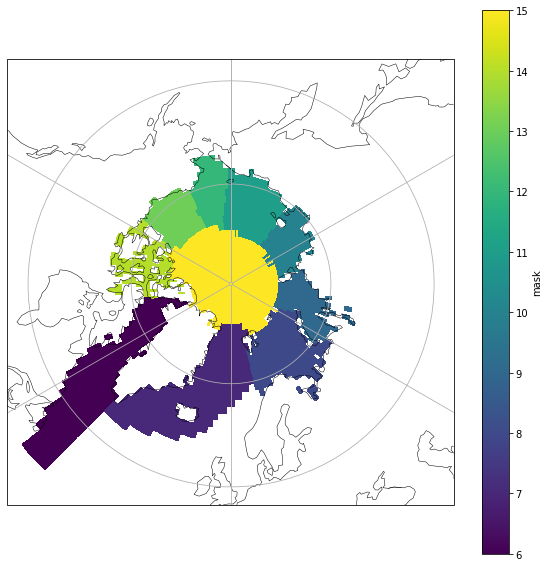

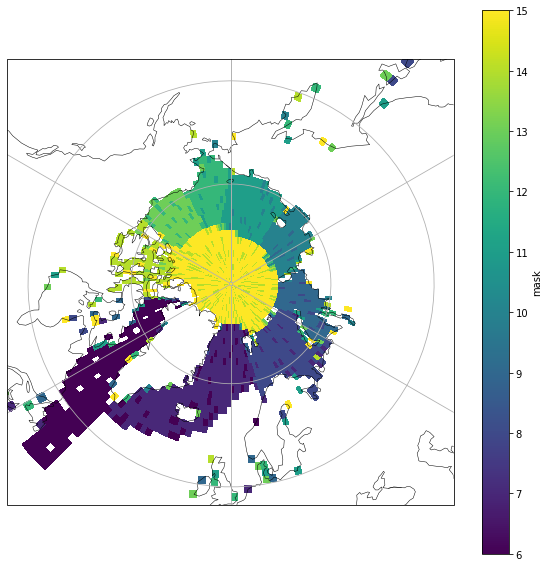

In [3]:
def plot_saved_output(path):
    test = xarray.open_mfdataset(
        paths=path,
        combine='by_coords'
    ).mask

    transform = ccrs.PlateCarree()
    fig, ax = plt.subplots(
        1, 
        1,
        figsize=(10, 10),
        subplot_kw={ 
            'projection': ccrs.Stereographic(central_latitude=90.0)
        }
    )
    ax.coastlines(resolution='110m', linewidth=0.5)
    ax.set_extent([-180, 180, 50, 90], transform)
    gl = ax.gridlines()
    gl.ylocator = matplotlib.ticker.LinearLocator(4)
    test.plot.pcolormesh(
        ax=ax,
        x='lon', 
        y='lat',
        transform=transform
    )

    
plot_saved_output('_data/NSIDC_Regions_Masks_LatLon_nearest_s2d.nc')
plot_saved_output('_data/NSIDC_Regions_Masks_LatLon_bilinear.nc')